In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
new_df = pd.read_csv('cleaned.csv')
new_df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Temperature(F),Humidity(%),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,42.1,58.0,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,36.9,91.0,10.0,Calm,0.0,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,36.0,97.0,10.0,Calm,0.0,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,39.0,55.0,10.0,Calm,0.0,0.00,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,37.0,93.0,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


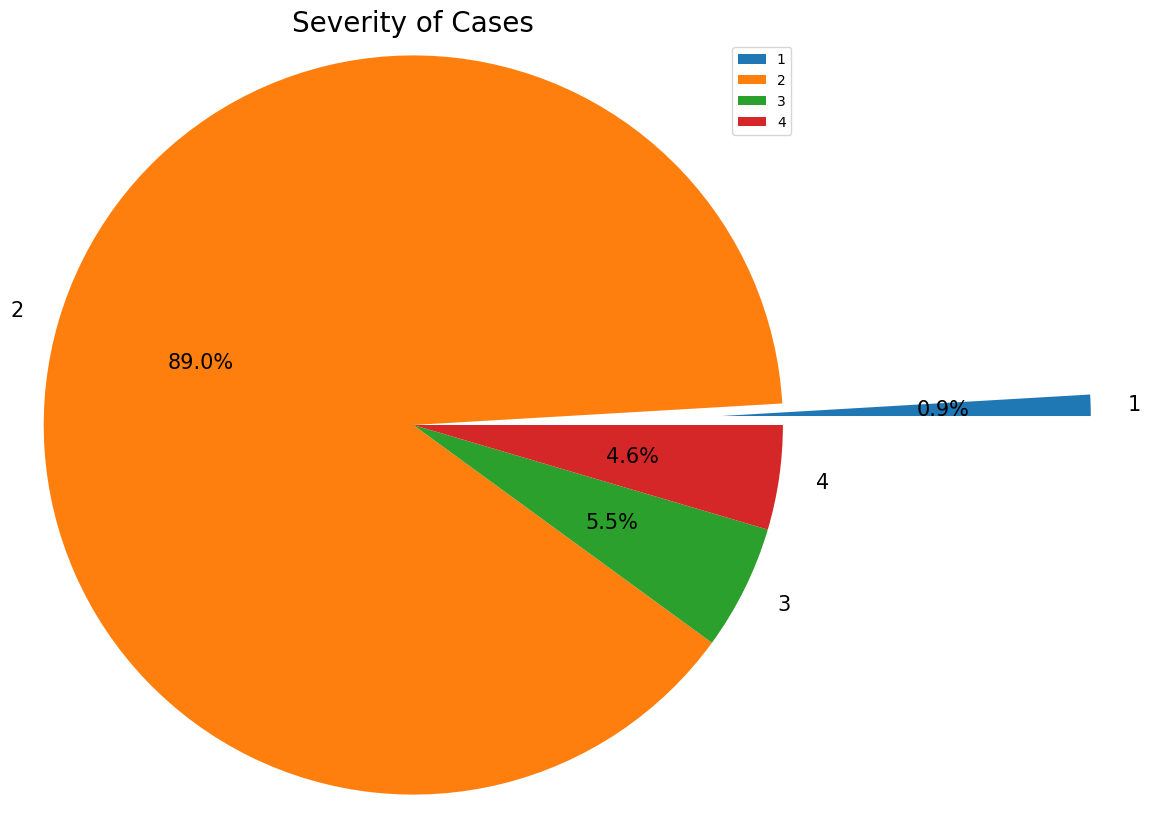

In [3]:
## Environmental Analysis
# Pie Chart Explaining the Distribution of Severity of the Data in the Dataframe
plt.figure(figsize = (12,10))
severity_pie = new_df.groupby('Severity').count()['ID'] ### group by severity in order to do circle map
mylabels = ["1", "2", "3", "4"]
plt.title("Severity of Cases",fontsize=20)
plt.pie(severity_pie, labels = mylabels,autopct='%1.1f%%',textprops={'fontsize': 15},radius=1.2,explode=(1,0,0,0))
plt.legend(mylabels, loc="best")

In [4]:
city_acc = new_df.groupby('City')['ID'].count().reset_index()
city_acc = city_acc.sort_values(by='ID', ascending=False)

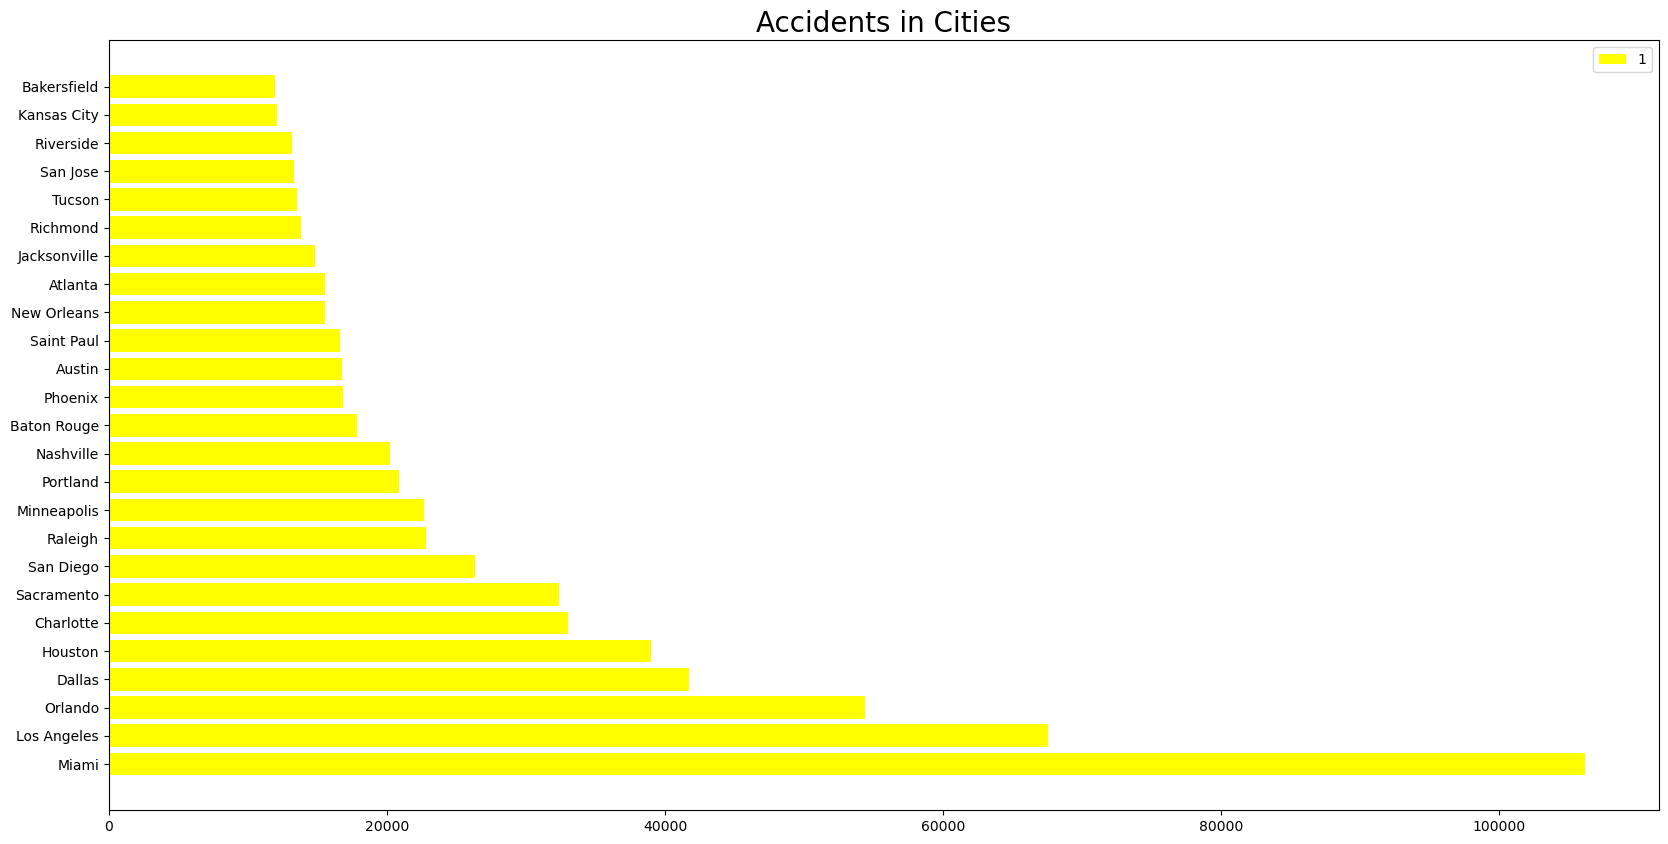

In [5]:
## Which City and State has got most numebr of accidents.
plt.figure(figsize = (20,10))
 ### group by severity in order to do circle map
plt.title("Accidents in Cities",fontsize=20)
plt.barh(city_acc['City'].iloc[:25], city_acc['ID'].iloc[:25], color = 'yellow')
plt.legend(mylabels, loc="best")

In [6]:
state_acc = new_df.groupby('State')['ID'].count().reset_index()
state_acc = state_acc.sort_values(by='ID', ascending=False)

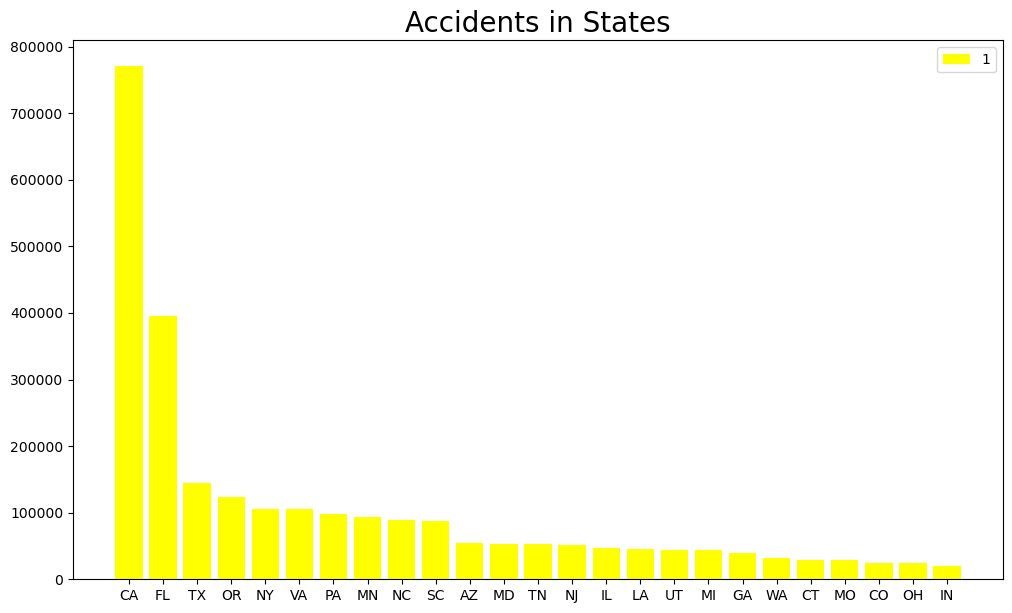

In [7]:
## Which City and State has got most number of accidents.
plt.figure(figsize = (12,7))
plt.title("Accidents in States",fontsize=20)
plt.bar(state_acc['State'].iloc[:25], state_acc['ID'].iloc[:25], color = 'yellow')
plt.legend(mylabels, loc="best")

In [8]:
type(new_df['Start_Time'])

pandas.core.series.Series

In [9]:
new_df['Start_Time'] = pd.to_datetime(new_df['Start_Time'])

ValueError: unconverted data remains when parsing with format "%Y-%m-%d %H:%M:%S": ".000000000", at position 224267. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [10]:
new_df['Start_Time']

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2754959    2019-08-23 18:03:25
2754960    2019-08-23 19:11:30
2754961    2019-08-23 19:00:21
2754962    2019-08-23 19:00:21
2754963    2019-08-23 18:52:06
Name: Start_Time, Length: 2754964, dtype: object

In [11]:
new_df['hour'] = new_df['Start_Time'].dt.hour

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
new_df['hour']

In [ ]:
accident_timing = new_df.groupby('hour')['ID'].count().reset_index()

In [ ]:
plt.figure(figsize = (12,10))
plt.bar(accident_timing['hour'], accident_timing['ID'], label = 'Count', width = 0.5,color = 'yellow')
sns.lineplot(accident_timing['hour'], accident_timing['ID'], color = 'black', marker = '.', ms = 11)
plt.ylabel('Casualties')
plt.xlabel('Timing')
plt.xticks(np.arange(24))
plt.title('Summary on Accidents W.R.T Timing.')
for i in range(len(accident_timing['hour'])):
    plt.text(i, accident_timing['ID'][i]*1.01,accident_timing['ID'][i], ha = 'center', va = 'center', fontstyle = 'normal', color = 'red', fontsize = 'x-large')
plt.show()

In [ ]:
plt.figure(figsize = (12,10))
sns.displot(new_df, x="Temperature(F)", hue="Severity", palette="Set1", height=5, aspect=2,bins=20,kde=True)
plt.title('\n Reported Temperature with Different Severity \n', size=20)
plt.ylabel('\n Count \n', fontsize=15)
plt.xlabel('\n Temperature(F) \n', fontsize=15)



In [ ]:
new_df['month'] = pd.to_datetime(new_df['Start_Time']).dt.month

In [ ]:
month_pattern = new_df.groupby('month')['ID'].count().reset_index()
month_pattern

In [ ]:
month_pattern_df = month_pattern

In [ ]:
plt.figure(figsize = (15,5))
plt.bar(month_pattern_df['month'], month_pattern_df['ID'], color = 'yellow', width = 0.35)
sns.lineplot(month_pattern_df['month'], month_pattern_df['ID'], color= 'blue', label = 'Sum', marker = '.', ms = 9)
xticks = np.arange(13)
x_labels = ['0','January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(ticks = xticks, labels = x_labels)
plt.title('Relationship Between Month and Accident Rates.')
for i in range(len(month_pattern_df)):
    plt.text(i+1,month_pattern_df['ID'].iloc[i]*1.02,month_pattern_df['ID'].iloc[i], fontstyle = 'normal',color = 'black',ha = 'center' ,verticalalignment='center', fontsize = 'large')
plt.show()

In [ ]:
visibility = pd.DataFrame(new_df["Visibility(mi)"].value_counts()).reset_index().rename(columns={"index":"Visibility","Visibility(mi)":"Cases"})
### recreate a panda data frame
plt.figure(figsize=(12,10))
plt.title('\n Cases Reported for Visibility \n', size=20)
plt.ylabel('\n Visibility(mi) \n', fontsize=15)
plt.xlabel('\n Number of Accidents\n', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlim(1000,60000)
a = sns.scatterplot(x=visibility.Cases,y=visibility.Visibility[visibility.Visibility<30],color='red')
plt.show()

In [ ]:
precipitation = pd.DataFrame(new_df["Precipitation(in)"].value_counts()).reset_index().rename(columns={"index":"Precipitation","Precipitation(in)":"Cases"})
plt.figure(figsize=(10,8))
plt.title('\n Cases Reported for Precipitation(in) \n', size=20)
plt.ylabel('\n Precipitation(in)) \n', fontsize=15)
plt.xlabel('\n Number of Accidents\n', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlim(0,500)
a = sns.scatterplot(x=precipitation.Cases,y=precipitation.Precipitation[precipitation.Precipitation<5], color = 'red')
plt.show()

In [ ]:
year_month = new_df["Start_Time"].groupby(new_df.Start_Time.dt.to_period("M")).agg('count').reset_index(name='Num_Accidents')

In [ ]:
palette = sns.color_palette("tab10", 6)
plt.figure(figsize = (10,8))
plt.xlabel("Month",fontsize=15)
plt.ylabel("Number of Accidents",fontsize=15)
plt.title('Number of Accidents of 2016-2021 by Months',size=20)
sns.lineplot(data=year_month, x=year_month.Start_Time.dt.month, y=year_month.Num_Accidents, hue=year_month.Start_Time.dt.year,
             style=year_month.Start_Time.dt.year, palette=palette)

In [ ]:
plt.figure(figsize = (10,8))
plt.xlabel("Month",fontsize=15)
plt.ylabel("Temperature level",fontsize=15)
plt.title('Temperature Variation of 2016-2021 by Months',size=20)
sns.lineplot(data=new_df, x=new_df.Start_Time.dt.month, y=new_df["Temperature(F)"], hue=new_df.Start_Time.dt.year,
             style=new_df.Start_Time.dt.year, color = 'red')

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="Start_Lng", y="Start_Lat", hue="State", data=new_df, s=10, legend=False)
plt.xlabel("Longtiude")
plt.ylabel("Latitude")
plt.show()

In [ ]:
## Location Analysis

import folium
from folium.plugins import HeatMap
sample_df= new_df.sample(int(0.001*len(new_df)))
lat_lng_pairs= list(zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng)))
map= folium.Map([38.552397, -96],zoom_start=6, min_zoom = 5, max_zoom = 13)
HeatMap(lat_lng_pairs).add_to(map)
map

1. Increase help and resting station for drivers all year round. This is due to most car accidents happened at a normal temperature 50-80F.
2. Provide benefits for people staying at indoors when the weather has a low visbility. This is due to low visbility results in more car accidents than any other environmental factors.
3. Give incentives for people who stay off cars during the COVID-19 period. This is due to the work-from-home mode and yearly environmental factors do not contribute to more car accidents.

In [ ]:
list1 =[ 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight']

In [ ]:
for i in list1:
  plt.bar(new_df[i].value_counts().keys(), new_df[i].value_counts(), color = 'yellow', width = 0.35)
  plt.title(i)
  plt.show()

In [ ]:
## Clustering Example using Strip plot
### sns.regplot(x=df_2['Severity'],y=df_2['Temperature(F)'])
fig, ax = plt.subplots(figsize = (10,5))
plt.title('\n Relationship between Temperature and Severity \n', size=20)
plt.ylabel('\n Temperature(F) \n', fontsize=15)
plt.xlabel('\n Severity \n', fontsize=15)
sns.stripplot(x=new_df['Severity'],y=new_df['Temperature(F)'],data=new_df,jitter=0.2)

In [ ]:
## Predictive Analysis

# Our starting and ending latitudes show a positive correlation. This is merely a test to see how our data functions.


plt.style.use('seaborn')

new_df.plot(x = 'Start_Lat', y='End_Lat',kind='scatter')
plt.show()

In [ ]:
new_df.info()

In [ ]:
new_df.head()

In [ ]:
# Dropping some more irrelevant columns.
new_df.drop(['Description', 'Street', 'County', 'ID', 'Timezone', 'Airport_Code', 'Zipcode'], axis = 1, inplace = True)

In [ ]:
new_df['End_Time'] = pd.to_datetime(new_df['End_Time'])

In [ ]:
new_df['end_hour'] = new_df['End_Time'].dt.hour
new_df['end_month'] = new_df['End_Time'].dt.month

In [ ]:
new_df.drop(['Start_Time', 'End_Time'], axis = 1, inplace = True)

In [ ]:
# Convert Object type to Int.
new_df.info()

In [ ]:
cols = ['Side', 'City', 'State', 'Country', 'Wind_Direction', 'Weather_Condition']
#
# Encode labels of multiple columns at once
#
new_df[cols] = new_df[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
new_df.head()

In [ ]:
cols = ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight','Astronomical_Twilight']
new_df[cols] = new_df[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
new_df.head()

In [ ]:
cols = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

new_df[cols] = new_df[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
new_df.head()

In [ ]:
# Sperating the taregt and independent features
X = new_df.drop(['Severity'], axis = 1)
y = new_df['Severity']

In [ ]:
# Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
X_train = X_train[:8000]
y_train = y_train[:8000]
X_test = X_test[:5000]
y_test = y_test[:5000]

In [ ]:

neig = KNeighborsClassifier(n_neighbors=4)
neig.fit(X_train, y_train)

print_score(neig, X_train, y_train, X_test, y_test, train=True)
print_score(neig, X_train, y_train, X_test, y_test, train=False)